# Exploratory Data Analysis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Extracting & Reading Dataset

In [2]:
dataset = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(dataset)

        VIN (1-10)        County       City State  Postal Code  Model Year  \
0       5YJSA1E22K          King    Seattle    WA      98112.0        2019   
1       3MW39FS05R        Yakima     Zillah    WA      98953.0        2024   
2       1N4AZ0CP0F          King       Kent    WA      98031.0        2015   
3       5YJSA1H20F     Snohomish    Bothell    WA      98012.0        2015   
4       JTMAB3FV1N        Yakima     Yakima    WA      98908.0        2022   
...            ...           ...        ...   ...          ...         ...   
191402  5YJ3E1EA0K        Pierce     Sumner    WA      98390.0        2019   
191403  JN1BF0BA7P        Pierce   Wilkeson    WA      98396.0        2023   
191404  7SAYGDEE4R          King  Fall City    WA      98024.0        2024   
191405  7SAXCBE65N  Grays Harbor   Aberdeen    WA      98520.0        2022   
191406  7SAYGAEEXP        Benton   Richland    WA      99352.0        2023   

          Make       Model                   Electric Vehicle T

### Descriptive information about columns

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

### Drop the unnecessary columns

In [4]:
dataset.drop(['VIN (1-10)', 'Postal Code', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'], axis = 1, inplace = True)

In [5]:
dataset.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42


### Check for null values 

In [6]:
dataset.isna().sum()

County                                               4
City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
dtype: int64

### Drop the null values

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()

County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
dtype: int64

In [9]:
dataset.shape

(191403, 9)

In [10]:
dataset.describe()

,Model Year,Electric Range
count,191403.000000,191403.000000
mean,2020.732392,55.654833
std,2.990490,90.150402
min,1997.000000,0.000000
25%,2019.000000,0.000000
50%,2022.000000,0.000000
75%,2023.000000,72.000000
max,2025.000000,337.000000


In [11]:
sns.set_style('darkgrid')

### Which county has most no. of EV cars ?

In [12]:
Counties = dataset.groupby('County').count().sort_values(by = 'City', ascending = False)['City'].index
values_county = dataset.groupby('County').count().sort_values(by = 'City', ascending = False)['City'].values
 
px.bar(x = Counties[:10], y = values_county[:10], labels = {'x' : 'County Name', 'y' : 'Number of cars'}, color = values_county[:10])

--> Most EV cars are in 'King' county

### Which company manufactures and sells most no. of EV(s) present in the market

In [13]:
Companies = dataset.groupby('Make').count().sort_values(by = 'City', ascending = False)['City'].index
values_companies = dataset.groupby('Make').count().sort_values(by = 'City', ascending = False)['City'].values

px.bar(x = Companies[:10], y = values_companies[:10], labels = {'x' : 'Company Name', 'y' : 'Number of cars sold'}, color = values_companies[:10])

--> Tesla is the lead manufacturer and seller as of 2024

In [14]:
fig = px.pie(names = Companies[:10], values = values_companies[:10], height = 600, width = 600)
fig.update_layout(title='Market Share of comapnies')

--> TESLA has the highest market share in among the fellow car companies

### Wjich are the top 10 models sold ?

In [15]:
model_index = dataset.groupby('Model').count().sort_values(by = 'City', ascending = False)['City'].index
model_sales = dataset.groupby('Model').count().sort_values(by = 'City', ascending = False)['City'].values

px.bar(x = model_index[:10], y = model_sales[:10], labels = {'x' : 'Car Model', 'y' : 'No. of units sold'}, color = model_sales[:10])

--> It is hence derived that 'MODEL Y' is the most sold car model followed by 'MODEL 3'

In [16]:
dataset.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42


In [17]:
dataset[dataset['Electric Range'] == 0].count()

County                                               102133
City                                                 102133
State                                                102133
Model Year                                           102133
Make                                                 102133
Model                                                102133
Electric Vehicle Type                                102133
Clean Alternative Fuel Vehicle (CAFV) Eligibility    102133
Electric Range                                       102133
dtype: int64

--> From the data provided it is derived that Electric range of EV(s) of most of the cars is zero. But in reality it cannot be zero. Hence we'll conclude that the Electric Range data provided to us is invalid and therefore we'll eliminate that column

In [18]:
dataset.drop(['Electric Range'], inplace = True, axis = 1)

### Which state has most no. of EV(s)

In [19]:
state = dataset.groupby('State').count().sort_values(by = 'City', ascending = False)['City'].index
values_state = dataset.groupby('State').count().sort_values(by = 'City', ascending = False)['City'].values

fig2 = px.pie(names = state[:10], values = values_state[:10], height = 600, width = 600)
fig2.update_layout(title='State wise car sale')

--> This pie chart signifies that most of the EV cars are present in WA state

### Year wise sales distribution

In [20]:
dataset_year = dataset.groupby('Model Year').count()['City'].cumsum().reset_index(name='Cummulative Sales')
print(dataset_year)

    Model Year  Cummulative Sales
0         1997                  1
1         1998                  2
2         1999                  7
3         2000                 14
4         2002                 16
5         2003                 17
6         2008                 38
7         2010                 62
8         2011                798
9         2012               2393
10        2013               6756
11        2014              10289
12        2015              15107
13        2016              20635
14        2017              29284
15        2018              43622
16        2019              54554
17        2020              66703
18        2021              86234
19        2022             114350
20        2023             174434
21        2024             191397
22        2025             191403


In [21]:
# Filter the dataset for Model Year > 2009
filtered_data = dataset_year[dataset_year['Model Year'] > 2009]

px.bar(filtered_data, x='Model Year', y='Cummulative Sales', title='No. of EV cars', color = 'Cummulative Sales')

--> We can see that sales of EV(s) grew exponentially after 2010. Hence, we can state that after 2010, people actually got to know about EV(s) and started purchasing it. Therefore, we'll calculate the growth 2010 onwards till 2023

### At what CAGR is the EV industry growing since 2010 ? 

In [22]:
initial_val = filtered_data['Cummulative Sales'].values[0]
final_val = filtered_data['Cummulative Sales'].values[-1]
time = len(filtered_data) -1
cagr = (final_val / initial_val) ** (1 / time) - 1
print(cagr*100)

70.85871537436765


--> The EV industry is growing at a staggering rate of 70.85 % (CAGR) since 2010

### Checking for CAFV Eligibility

In [23]:
eligibility_index = dataset.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').count()['City'].index
values_eligibilty = dataset.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').count()['City'].values
print(values_eligibilty)

fig3 = px.pie(names = eligibility_index, values = values_eligibilty, height = 900, width = 900)
fig3.update_layout(title = 'CAFV Eligibility')

[ 68781 102133  20489]


--> Most of the cars' eligibility is yet to be known as battery range has not been researched

### Which EV type is more prominent in the market ?

In [24]:
type_index = dataset.groupby('Electric Vehicle Type').count()['City'].index
values_type = dataset.groupby('Electric Vehicle Type').count()['City'].values

fig4 = px.pie(names = type_index, values = values_type, height = 600, width = 600)
fig4.update_layout(title = 'EV Type')

--> Most of the cars are Battery Electric Vehicle (BEV)

### Which car company manufactures what type of EV

In [25]:
dataset_make = dataset[['Make', 'City', 'Electric Vehicle Type']]
print(dataset_make)

          Make       City                   Electric Vehicle Type
0        TESLA    Seattle          Battery Electric Vehicle (BEV)
1          BMW     Zillah  Plug-in Hybrid Electric Vehicle (PHEV)
2       NISSAN       Kent          Battery Electric Vehicle (BEV)
3        TESLA    Bothell          Battery Electric Vehicle (BEV)
4       TOYOTA     Yakima  Plug-in Hybrid Electric Vehicle (PHEV)
...        ...        ...                                     ...
191402   TESLA     Sumner          Battery Electric Vehicle (BEV)
191403  NISSAN   Wilkeson          Battery Electric Vehicle (BEV)
191404   TESLA  Fall City          Battery Electric Vehicle (BEV)
191405   TESLA   Aberdeen          Battery Electric Vehicle (BEV)
191406   TESLA   Richland          Battery Electric Vehicle (BEV)

[191403 rows x 3 columns]


### How many car manufacturing companies are present ?

In [26]:
dataset_make['Make'].nunique()

42

--> There are 42 car manufacturing companies present in the dataset

### Which company sells what EV type ?

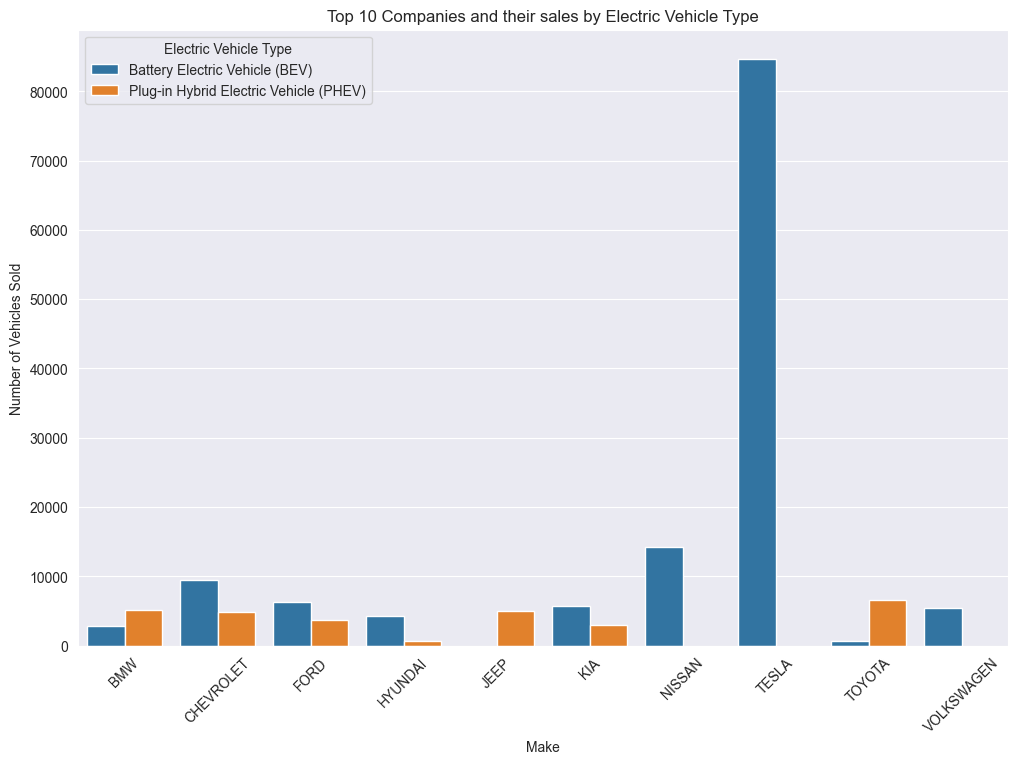

In [27]:
vehicle_counts = dataset.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

top_companies = vehicle_counts.groupby('Make')['Count'].sum().nlargest(10).index
top_vehicle_counts = vehicle_counts[vehicle_counts['Make'].isin(top_companies)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Count', hue='Electric Vehicle Type', data=top_vehicle_counts)
plt.title('Top 10 Companies and their sales by Electric Vehicle Type')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()

--> It is found that most of the cars sols are Battery Electric Vehicle (BEV). Tesla, which has the highest market share w.r.t. to its peers, sells only BEV. We can therefore say that BEV are more preferred than PHEV

In [28]:
dataset.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible


### EV(s) are present in how many states ? 

In [29]:
print(dataset['State'].nunique())

44


--> EV(s) are currently present in 44 different states of USA

### Representation through maps

In [30]:
states = dataset.groupby('State').count().sort_values(by = 'City', ascending = False)['City'].reset_index(name='Count')
values_state = dataset.groupby('State').count().sort_values(by = 'City', ascending = False)['City'].values

fig = px.choropleth(states,
                    locations=states['State'], 
                    locationmode="USA-states", 
                    color=states['Count'],
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()